In [75]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate

In [81]:
def preprocess(countpath, testsize = 0.2):
    x = pd.read_csv('%s' % countpath, index_col=0).T

    # get feature names
    featurenames = np.array(x.index)

    # get label names
    x = x.T
    y = list(np.array(x.index))
    label = sorted(list(set(y)), key = y.index)
    
    df = x
    df['target'] = y

    for classname in label:
        count_temp = len(df[df.target == classname])
        print("Proportion of family {0}: {1:.2f}%".format(classname, (count_temp / (len(df.target)) * 100)))


    y = df.target.values
    x_data = df.drop(['target'], axis=1)

    # Normalize
    x_data.apply(lambda x :(x-np.min(x))/(np.max(x)-np.min(x)))
    #x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
    x = x_data
    x = x.dropna(axis=1, how='any')  # drop all rows that have any NaN value
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize)

    # transpose matrices
    # over_samples_train = SMOTE(random_state=10, n_jobs=-1, sampling_strategy=1)
    # x_train, y_train = over_samples_train.fit_sample(x_train, y_train)
    # over_samples_test = SMOTE(random_state=10, n_jobs=-1, sampling_strategy=1)
    # x_test, y_test = over_samples_test.fit_sample(x_test, y_test)

    return x_train, y_train, x_test, y_test, featurenames, label, df

In [105]:
scoring = {'acc': 'accuracy',
           'prec_weighted': 'precision_weighted',
           'rec_weighted': 'recall_weighted',
           'f1_weighted':'f1_weighted'}

In [113]:
countpath = './NEW_Highfrequencies.csv'

x_train, y_train, x_test, y_test, featurenames, label, dataframe = preprocess(countpath, 0.35)

Proportion of family RF00050: 7.48%
Proportion of family RF00059: 22.34%
Proportion of family RF00162: 7.67%
Proportion of family RF00167: 5.02%
Proportion of family RF00168: 2.11%
Proportion of family RF00174: 26.48%
Proportion of family RF00234: 1.70%
Proportion of family RF00380: 1.34%
Proportion of family RF00504: 13.13%
Proportion of family RF00521: 1.03%
Proportion of family RF00522: 0.72%
Proportion of family RF00634: 1.33%
Proportion of family RF01051: 6.30%
Proportion of family RF01054: 0.24%
Proportion of family RF01055: 1.87%
Proportion of family RF01057: 1.22%


In [121]:
x_train

,A,C,G,U,AA,AC,AG,AU,CA,CC,...,GAUU,GACA,GACU,GUAA,GUCG,GUGG,GCAA,GCCU,GGUU,GGGC
Class,,,,,,,,,,,,,,,,,,,,,
RF00174,36,75,79,24,4,14,17,1,12,24,...,1,1,0,0,0,0,0,0,0,0
RF00162,34,25,31,22,8,3,12,7,8,7,...,1,0,0,1,0,1,1,1,2,0
RF00174,37,59,64,37,8,9,12,7,9,18,...,0,0,0,0,0,0,0,1,0,3
RF00059,30,24,28,24,8,6,5,9,6,6,...,0,0,0,2,3,0,1,1,2,1
RF00522,17,12,10,6,5,4,3,1,3,3,...,1,0,0,0,0,0,1,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RF00162,28,28,38,15,6,7,4,7,4,7,...,1,1,0,3,0,0,0,2,1,0
RF00059,24,28,24,25,4,8,5,6,6,6,...,0,1,1,0,3,0,1,0,0,0
RF01057,13,22,20,16,1,4,4,4,4,3,...,0,0,0,0,0,0,1,1,1,1


In [85]:
def calcu_metrix(scores):
    return (np.mean(scores['test_f1_weighted']) * 0.6 + np.mean(scores['test_prec_weighted'])*0.2 + np.mean(scores['test_rec_weighted'])* 0.2)


In [114]:
counting = {}
for i in label:
    count = 0
    for j in y_train:
        if i == j:
            count = count+1        
    counting[i] = count
counting

{'RF00050': 793,
 'RF00059': 2327,
 'RF00162': 810,
 'RF00167': 512,
 'RF00168': 217,
 'RF00174': 2828,
 'RF00234': 201,
 'RF00380': 140,
 'RF00504': 1402,
 'RF00521': 102,
 'RF00522': 69,
 'RF00634': 153,
 'RF01051': 628,
 'RF01054': 28,
 'RF01055': 187,
 'RF01057': 122}

In [115]:
dict = {}
for i in label:
    if counting[i] > 2000:
        dict[i] = counting[i]
    elif counting[i] > 700:
        dict[i] = 1500
    elif counting[i] > 400:
        dict[i] = 1000
    elif counting[i] >100:
        dict[i] = 500
    else:
        dict[i] = 300
        
dict

{'RF00050': 1500,
 'RF00059': 2327,
 'RF00162': 1500,
 'RF00167': 1000,
 'RF00168': 500,
 'RF00174': 2828,
 'RF00234': 500,
 'RF00380': 500,
 'RF00504': 1500,
 'RF00521': 500,
 'RF00522': 300,
 'RF00634': 500,
 'RF01051': 1000,
 'RF01054': 300,
 'RF01055': 500,
 'RF01057': 500}

In [30]:
forest = RandomForestClassifier(n_estimators=1000, n_jobs=10, class_weight = 'balanced')
forest.fit(x_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [38]:
for i in featurenames:

array(['A', 'C', 'G', 'U', 'AA', 'AC', 'AG', 'AU', 'CA', 'CC', 'CG', 'CU',
       'GA', 'GC', 'GG', 'GU', 'UA', 'UC', 'UG', 'UU', 'UCC', 'CUA',
       'CUC', 'CUG', 'GGG', 'AAAC', 'AAUA', 'AAGA', 'AUCU', 'AUCG',
       'AUGG', 'ACAU', 'ACCG', 'ACGA', 'AGAG', 'AGUU', 'AGUC', 'AGGU',
       'AGGC', 'UAUA', 'UUAC', 'UUUC', 'UUCG', 'UUGU', 'UUGG', 'UCAA',
       'UCAU', 'UCUA', 'UGCU', 'CACA', 'CAGC', 'CUAA', 'CUAU', 'CUAC',
       'CUCU', 'CUGA', 'CCAA', 'CGUU', 'CGCU', 'CGGU', 'GAUA', 'GAUU',
       'GACA', 'GACU', 'GUAA', 'GUCG', 'GUGG', 'GCAA', 'GCCU', 'GGUU',
       'GGGC'], dtype=object)

In [32]:
importance = {}
count = 0
for i in featurenames:
    importance[i] = importances[count]
    count = count + 1
importance

{'A': 0.05793623128376688,
 'C': 0.04635768198908252,
 'G': 0.06463012958953057,
 'U': 0.045696824638011134,
 'AA': 0.024644684877988304,
 'AC': 0.018337816385001506,
 'AG': 0.03958226743021904,
 'AU': 0.024209919833564714,
 'CA': 0.020799735651590656,
 'CC': 0.03148375640326268,
 'CG': 0.02278957982162833,
 'CU': 0.02339658244136951,
 'GA': 0.04651031329261267,
 'GC': 0.032026704607101185,
 'GG': 0.03297565217197772,
 'GU': 0.0298293533503498,
 'UA': 0.0288874967273588,
 'UC': 0.02058354102956646,
 'UG': 0.0337919348479352,
 'UU': 0.022728892728471447,
 'UCC': 0.021175946154294852,
 'CUA': 0.02624257268439507,
 'CUC': 0.02218129568162399,
 'CUG': 0.02627691374159679,
 'GGG': 0.025241955326214607,
 'AAAC': 0.011696004465722458,
 'AAUA': 0.007778091444442457,
 'AAGA': 0.012896611166369372,
 'AUCU': 0.0051968701901960665,
 'AUCG': 0.008962261895554371,
 'AUGG': 0.008973580507476226,
 'ACAU': 0.002924700950747488,
 'ACCG': 0.004316703858391534,
 'ACGA': 0.004711459912400144,
 'AGAG': 0.00

In [56]:
label

['RF00050',
 'RF00059',
 'RF00162',
 'RF00167',
 'RF00168',
 'RF00174',
 'RF00234',
 'RF00380',
 'RF00504',
 'RF00521',
 'RF00522',
 'RF00634',
 'RF01051',
 'RF01054',
 'RF01055',
 'RF01057']

In [118]:
# KNN Model
def KNN(x_train, y_train, x_test, y_test):

    # try ro find best k value
    best = make_pipeline(SMOTE(random_state = 5, k_neighbors = 5, sampling_strategy = dict), KNeighborsClassifier(n_neighbors=4))
    scores = cross_validate(best, x_train, y_train, scoring = scoring, cv = 10, n_jobs=10)
    print(4)
    print(scores)
    best_metrix = calcu_metrix(scores)
    best.fit(x_train, y_train)

    scoreList = []
    scoreList.append(best.score(x_test, y_test))
    for i in range(6, 20, 2):
        knn2 = make_pipeline(SMOTE(random_state = 5, k_neighbors = 5, sampling_strategy = dict), KNeighborsClassifier(n_neighbors=i))  # n_neighbors means 
        scores = cross_validate(knn2, x_train, y_train, scoring = scoring, cv = 10, n_jobs=10)
        temp_metrix = calcu_metrix(scores)
        print(i)
        print(scores)
        if temp_metrix > best_metrix:
            best = knn2
        knn2.fit(x_train, y_train)
        scoreList.append(knn2.score(x_test, y_test))


    plt.plot(range(4, 20, 2), scoreList)
    plt.xticks(np.arange(4, 20, 2))
    plt.xlabel("K value")
    plt.ylabel("Score")
    plt.savefig("./Prediction_output/knn_iteration.png")
    plt.show()
    print("Maximum KNN Acuracy Score is {:.2f}%".format((max(scoreList)) * 100))
    
    best_pred = best.predict(x_test)
    # f1 score
    print("f1 score of best: {:.2f}".format(f1_score(y_test,best_pred, average = 'weighted')))
    # 模型评估报告
    print("Classification report of best3: \n{}".format(classification_report(y_test, best_pred,
                                            target_names= label)))


    return best

4
{'fit_time': array([1.04077482, 1.02390885, 1.0481317 , 1.0285511 , 1.01915407,
       1.73021817, 1.75186491, 1.02665687, 1.73090577, 1.76973891]), 'score_time': array([3.07588029, 3.11649966, 3.05944443, 2.9928205 , 3.04853988,
       3.66692019, 3.57047367, 3.00740123, 3.54711843, 3.62964034]), 'test_acc': array([0.77053824, 0.78638941, 0.76660342, 0.79942966, 0.78422053,
       0.76330798, 0.78136882, 0.74737846, 0.78871893, 0.76650718]), 'test_prec_weighted': array([0.80333942, 0.80721558, 0.79395142, 0.82535223, 0.81027573,
       0.78843394, 0.80849686, 0.78554276, 0.81520002, 0.79940713]), 'test_rec_weighted': array([0.77053824, 0.78638941, 0.76660342, 0.79942966, 0.78422053,
       0.76330798, 0.78136882, 0.74737846, 0.78871893, 0.76650718]), 'test_f1_weighted': array([0.77634386, 0.79159596, 0.77175665, 0.80572883, 0.78971715,
       0.76889436, 0.78731867, 0.75574734, 0.79435514, 0.77398786])}
6
{'fit_time': array([1.00994325, 1.0415895 , 1.0328629 , 1.02473235, 1.03304505

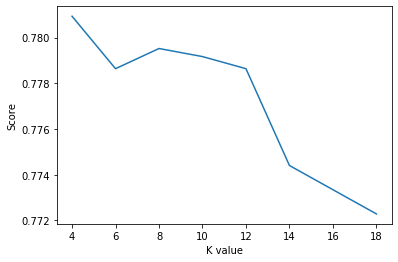

Maximum KNN Acuracy Score is 78.09%
f1 score of best: 0.78
Classification report of best3: 
              precision    recall  f1-score   support

     RF00050       0.63      0.83      0.72       418
     RF00059       0.93      0.72      0.81      1289
     RF00162       0.50      0.79      0.62       431
     RF00167       0.79      0.82      0.81       301
     RF00168       0.60      0.63      0.61       124
     RF00174       0.92      0.84      0.88      1458
     RF00234       0.50      0.55      0.53        74
     RF00380       0.57      0.86      0.69        77
     RF00504       0.86      0.67      0.75       723
     RF00521       0.57      0.95      0.72        65
     RF00522       0.88      0.96      0.92        47
     RF00634       0.52      0.87      0.65        63
     RF01051       0.84      0.78      0.81       392
     RF01054       0.33      0.82      0.47        11
     RF01055       0.55      0.67      0.60       116
     RF01057       0.60      0.88      0.71

In [120]:
knn = KNN(x_train, y_train, x_test, y_test)

4
{'fit_time': array([0.01792669, 0.01762247, 0.01747203, 0.0176115 , 0.01750278,
       0.01809502, 0.0178287 , 0.01774907, 0.01762629, 0.01765895]), 'score_time': array([0.65160227, 0.63355422, 0.64732742, 0.63946271, 0.64568996,
       0.65585542, 0.64266038, 0.61811709, 0.63820982, 0.62400126]), 'test_precision_macro': array([0.75298511, 0.74327146, 0.73028773, 0.77368208, 0.75566211,
       0.64761758, 0.71750383, 0.70616429, 0.79458148, 0.73574546]), 'test_recall_macro': array([0.63571647, 0.63401829, 0.66630862, 0.67465963, 0.6683992 ,
       0.59554791, 0.63421796, 0.66058435, 0.6570737 , 0.66201253]), 'test_f1_macro': array([0.67188203, 0.66644075, 0.68709797, 0.7075248 , 0.68964566,
       0.60968205, 0.66093574, 0.67186756, 0.70153728, 0.68420381])}
6
{'fit_time': array([0.01780844, 0.0174787 , 0.01733351, 0.0176568 , 0.01729012,
       0.01747537, 0.0179503 , 0.01737022, 0.01758695, 0.0176456 ]), 'score_time': array([0.68476748, 0.66520619, 0.6749382 , 0.67108417, 0.6707971

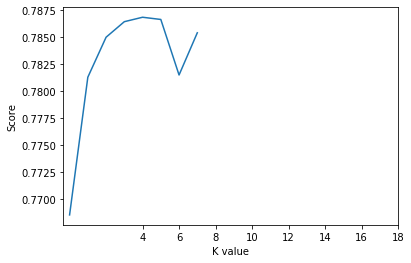

Maximum KNN Acuracy Score is 78.69%
f1 score of best3: 0.68
Classification report of best3: 
              precision    recall  f1-score   support

     RF00050       0.69      0.83      0.75       356
     RF00059       0.76      0.87      0.81      1059
     RF00162       0.64      0.61      0.63       388
     RF00167       0.82      0.66      0.73       259
     RF00168       0.70      0.51      0.59       101
     RF00174       0.87      0.88      0.88      1284
     RF00234       0.76      0.35      0.48        89
     RF00380       0.59      0.64      0.61        58
     RF00504       0.78      0.78      0.78       642
     RF00521       0.81      0.86      0.83        58
     RF00522       0.93      0.95      0.94        42
     RF00634       0.75      0.67      0.71        61
     RF01051       0.84      0.72      0.78       322
     RF01054       1.00      0.08      0.14        13
     RF01055       0.73      0.41      0.52        74
     RF01057       0.80      0.70      0.7

In [155]:
knn = KNN_im(x_train, y_train, x_test, y_test)

In [137]:

def KNN_im(x_train, y_train, x_test, y_test):

    # try ro find best k value
    best = KNeighborsClassifier(n_neighbors=4)
    scores = cross_validate(best, x_train, y_train, scoring = scoring, cv = 5, n_jobs=10)
    print(4)
    print(scores)
    best_metrix = calcu_metrix(scores)
    best.fit(x_train, y_train)

    scoreList = []
    scoreList.append(best.score(x_test, y_test))
    for i in range(6, 20, 2):
        knn2 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means 
        scores = cross_validate(knn2, x_train, y_train, scoring = scoring, cv = 10, n_jobs=10)
        temp_metrix = calcu_metrix(scores)
        print(i)
        print(scores)
        if temp_metrix > best_metrix:
            best = knn2
        knn2.fit(x_train, y_train)
        scoreList.append(knn2.score(x_test, y_test))


    plt.plot(range(0, 8), scoreList)
    plt.xticks(np.arange(4, 20, 2))
    plt.xlabel("K value")
    plt.ylabel("Score")
    plt.savefig("./Prediction_output/knn_iteration.png")
    plt.show()
    print("Maximum KNN Acuracy Score is {:.2f}%".format((max(scoreList)) * 100))
    
    best_pred = best.predict(x_test)
    # f1 score
    print("f1 score of best3: {:.2f}".format(f1_score(y_test,best_pred, average = 'macro')))
    # 模型评估报告
    print("Classification report of best3: \n{}".format(classification_report(y_test, best_pred,
                                            target_names= label)))

    return best

In [101]:
def SVM(x_train, y_train,x_test, y_test):

    best = make_pipeline(SMOTEENN(random_state = 1, sampling_strategy = dict), SVC(cache_size=4096, kernel='linear', probability=True, gamma='scale'))
#     scores = cross_validate(best, x_train, y_train, scoring = scoring, cv = 5, n_jobs=10)
#     best_metrix = calcu_metrix(scores)
#     print('linear')
#     print(scores)

    # try to find the best kernel
#     scoreList = []
#     best.fit(x_train, y_train)
#     scoreList.append(('linear', best.score(x_test, y_test)))

    best_metrix = 0
    scoreList = []
    for i in ('poly', 'rbf'):
        svm = make_pipeline(SMOTEENN(random_state = 1, sampling_strategy = dict), SVC(cache_size=4096, kernel='%s' % i, class_weight = 'balanced'))
        scores = cross_validate(svm, x_train, y_train, scoring = scoring, cv = 5, n_jobs=10)
        temp_metrix = calcu_metrix(scores)
        print(i)
        print(scores)
        if temp_metrix > best_metrix:
            best = svm
        svm.fit(x_train, y_train)
        scoreList.append((i, svm.score(x_test, y_test)))


    plt.title('Various kernels of SVM algorithms')
    plt.plot([x[0] for x in scoreList], [x[1] for x in scoreList])
    plt.xticks([x[0] for x in scoreList])
    plt.xlabel("Kernel")
    plt.ylabel("Score")
    plt.savefig("./Prediction_output/svm_kernel.png")
    plt.show()
    print("Maximum kernel Score is {:.2f}%".format((max([x[1] for x in scoreList])) * 100))

    best_pred = best.predict(x_test)
    # f1 score
    print("f1 score of best: {:.2f}".format(f1_score(y_test,best_pred, average = 'macro')))
    # 模型评估报告
    print("Classification report of best3: \n{}".format(classification_report(y_test, best_pred,
                                            target_names= label)))

    return best

SyntaxError: invalid syntax (<ipython-input-101-a6dc8ea9e5f8>, line 18)

In [42]:
svm = SVM(x_train, y_train, x_test, y_test)

KeyError: 'test_f1_macro'

poly
{'fit_time': array([35.09929872, 27.91461945, 30.83475614, 34.5690701 , 39.3194952 ]), 'score_time': array([2.82819104, 2.81238079, 2.86741877, 2.83747172, 2.73172617]), 'test_acc': array([0.86404548, 0.85876777, 0.85068949, 0.85843661, 0.85979971]), 'test_prec_weighted': array([0.86626116, 0.86331049, 0.85777204, 0.86256546, 0.86540103]), 'test_rec_weighted': array([0.86404548, 0.85876777, 0.85068949, 0.85843661, 0.85979971]), 'test_f1_weighted': array([0.86415668, 0.859892  , 0.85208627, 0.85954861, 0.86116973])}


/home/liuchong/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf
{'fit_time': array([38.18309426, 38.88267422, 38.31549168, 38.283319  , 38.53955531]), 'score_time': array([10.57649112, 10.48817635, 10.51781249, 10.53827238, 10.47880006]), 'test_acc': array([0.82330649, 0.82417062, 0.81597718, 0.81935176, 0.81497377]), 'test_prec_weighted': array([0.8360739 , 0.84004585, 0.8271028 , 0.83115064, 0.82634551]), 'test_rec_weighted': array([0.82330649, 0.82417062, 0.81597718, 0.81935176, 0.81497377]), 'test_f1_weighted': array([0.81842589, 0.81689178, 0.8105328 , 0.81275391, 0.80847087])}


/home/liuchong/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


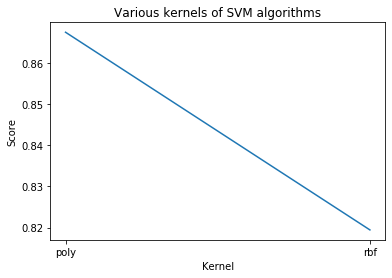

Maximum kernel Score is 86.74%
f1 score of best: 0.82
Classification report of best3: 
              precision    recall  f1-score   support

     RF00050       0.83      0.75      0.78       418
     RF00059       0.89      0.86      0.88      1289
     RF00162       0.84      0.71      0.77       431
     RF00167       0.90      0.78      0.84       301
     RF00168       0.71      0.35      0.47       124
     RF00174       0.72      0.94      0.81      1458
     RF00234       0.69      0.39      0.50        74
     RF00380       1.00      0.49      0.66        77
     RF00504       0.85      0.83      0.84       723
     RF00521       0.97      0.91      0.94        65
     RF00522       0.98      0.94      0.96        47
     RF00634       0.84      0.73      0.78        63
     RF01051       0.92      0.84      0.88       392
     RF01054       1.00      0.27      0.43        11
     RF01055       0.84      0.48      0.61       116
     RF01057       0.86      0.79      0.82     

In [116]:
best = make_pipeline(SMOTE(random_state = 1, k_neighbors= 4), SVC(cache_size=4096, kernel='linear', class_weight = 'balanced'))
best_metrix = 0
scoreList = []
for i in ('poly', 'rbf'):
    svm = make_pipeline(SMOTE(random_state = 1, sampling_strategy = dict, k_neighbors = 4), SVC(cache_size=4096, kernel='%s' % i, class_weight = 'balanced'))
    scores = cross_validate(svm, x_train, y_train, scoring= scoring, cv = 5, n_jobs=10)
    temp_metrix = calcu_metrix(scores)
    print(i)
    print(scores)
    if temp_metrix > best_metrix:
        best = svm
    svm.fit(x_train, y_train)
    scoreList.append((i, svm.score(x_test, y_test)))


plt.title('Various kernels of SVM algorithms')
plt.plot([x[0] for x in scoreList], [x[1] for x in scoreList])
plt.xticks([x[0] for x in scoreList])
plt.xlabel("Kernel")
plt.ylabel("Score")
plt.savefig("./Prediction_output/svm_kernel.png")
plt.show()
print("Maximum kernel Score is {:.2f}%".format((max([x[1] for x in scoreList])) * 100))

best_pred = best.predict(x_test)
# f1 score
print("f1 score of best: {:.2f}".format(f1_score(y_test,best_pred, average = 'weighted')))
# 模型评估报告
print("Classification report of best3: \n{}".format(classification_report(y_test, best_pred,
                                        target_names= label)))

In [108]:
i

'rbf'

In [94]:
len(y_train)

11328

poly
{'fit_time': array([19.96075392, 19.97201014, 19.96872568, 20.02934432, 20.27423334]), 'score_time': array([4.31011987, 4.26527429, 4.33896875, 4.29055905, 4.28135538]), 'test_acc': array([0.75035528, 0.73222749, 0.7489301 , 0.74261201, 0.74487363]), 'test_prec_weighted': array([0.71893471, 0.68928092, 0.70929375, 0.70677258, 0.70990996]), 'test_rec_weighted': array([0.75035528, 0.73222749, 0.7489301 , 0.74261201, 0.74487363]), 'test_f1_weighted': array([0.71619797, 0.69897484, 0.71719043, 0.71162473, 0.71319865])}
rbf
{'fit_time': array([24.42928362, 24.74031901, 24.08635974, 24.2198894 , 24.70734668]), 'score_time': array([5.48797846, 5.4814322 , 5.43674517, 5.4145844 , 5.43246245]), 'test_acc': array([0.78588347, 0.77725118, 0.77223015, 0.78169685, 0.78493085]), 'test_prec_weighted': array([0.77988192, 0.76446999, 0.76436146, 0.77450617, 0.76762211]), 'test_rec_weighted': array([0.78588347, 0.77725118, 0.77223015, 0.78169685, 0.78493085]), 'test_f1_weighted': array([0.75929341,

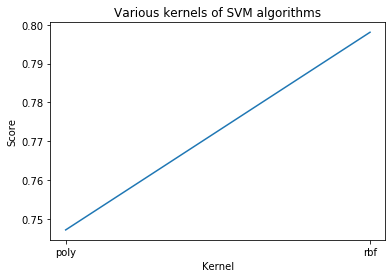

Maximum kernel Score is 79.81%
f1 score of best: 0.61
Classification report of best3: 
              precision    recall  f1-score   support

     RF00050       0.76      0.80      0.78       418
     RF00059       0.80      0.92      0.85      1289
     RF00162       0.79      0.66      0.72       431
     RF00167       0.84      0.69      0.76       301
     RF00168       0.59      0.53      0.56       124
     RF00174       0.82      0.90      0.86      1458
     RF00234       0.67      0.22      0.33        74
     RF00380       1.00      0.04      0.08        77
     RF00504       0.77      0.86      0.81       723
     RF00521       0.81      0.34      0.48        65
     RF00522       0.76      0.96      0.85        47
     RF00634       0.80      0.52      0.63        63
     RF01051       0.82      0.80      0.81       392
     RF01054       0.00      0.00      0.00        11
     RF01055       0.94      0.28      0.43       116
     RF01057       0.94      0.61      0.74     

/home/liuchong/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liuchong/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
svm = SVM_im(x_train, y_train, x_test, y_test)

In [62]:
def SVM_im(x_train, y_train,x_test, y_test):

    best = SVC(cache_size=4096, kernel='linear')
#     scores = cross_validate(best, x_train, y_train, scoring = scoring, cv = 5, n_jobs=10)
#     best_metrix = calcu_metrix(scores)
#     print('linear')
#     print(scores)

    best_metrix = 0
    # try to find the best kernel
    scoreList = []
#     best.fit(x_train, y_train)
#     scoreList.append(('linear', best.score(x_test, y_test)))
    for i in ('poly', 'rbf'):
        svm = SVC(cache_size=4096, kernel='%s' % i, probability=True, gamma='scale')
        scores = cross_validate(svm, x_train, y_train, scoring = scoring, cv = 5, n_jobs=10)
        temp_metrix = calcu_metrix(scores)
        print(i)
        print(scores)
        if temp_metrix > best_metrix:
            best = svm
        svm.fit(x_train, y_train)
        scoreList.append((i, svm.score(x_test, y_test)))


    plt.title('Various kernels of SVM algorithms')
    plt.plot([x[0] for x in scoreList], [x[1] for x in scoreList])
    plt.xticks([x[0] for x in scoreList])
    plt.xlabel("Kernel")
    plt.ylabel("Score")
    plt.savefig("./Prediction_output/svm_kernel.png")
    plt.show()
    print("Maximum kernel Score is {:.2f}%".format((max([x[1] for x in scoreList])) * 100))

    best_pred = best.predict(x_test)
    # f1 score
    print("f1 score of best: {:.2f}".format(f1_score(y_test,best_pred, average = 'macro')))
    # 模型评估报告
    print("Classification report of best3: \n{}".format(classification_report(y_test, best_pred,
                                            target_names= label)))

    return best

In [59]:
scores

{'fit_time': array([69.05557632, 68.41081929, 69.61304688, 68.22121739, 68.29172635]),
 'score_time': array([3.26478505, 3.35753632, 3.27547884, 3.38295889, 3.2953527 ]),
 'test_acc': array([0.80945044, 0.8018528 , 0.82225657, 0.81752577, 0.81897886]),
 'test_prec_macro': array([0.83411648, 0.8285737 , 0.84762591, 0.83912618, 0.84542965]),
 'test_rec_micro': array([0.80945044, 0.8018528 , 0.82225657, 0.81752577, 0.81897886]),
 'test_f1': array([0.81572944, 0.80808715, 0.82942086, 0.82302493, 0.826607  ])}

In [168]:
best = make_pipeline(SMOTE(random_state = 5), KNeighborsClassifier(n_neighbors=10))
scores = cross_validate(best, x_train, y_train, scoring = scoring, cv = 5, n_jobs=10)
print(scores)
best.fit(x_train, y_train)
best.score(x_test, y_test)
best_pred = best.predict(x_test)
# f1 score
print("f1 score of best: {:.2f}".format(f1_score(y_test,best_pred, average = 'macro')))
# 模型评估报告
print("Classification report of best: \n{}".format(classification_report(y_test, best_pred,
                                        target_names= label)))
best_proba = best.predict_proba(x_test)

{'fit_time': array([1.36815619, 1.38522267, 1.27516413, 1.46671844, 1.39341235]), 'score_time': array([65.77883387, 66.15830994, 64.95893312, 67.77423406, 66.04027724]), 'test_precision_macro': array([0.45819163, 0.48098308, 0.45682151, 0.47233651, 0.47222897]), 'test_recall_macro': array([0.69405591, 0.69335485, 0.67254681, 0.7193012 , 0.69062105]), 'test_f1_macro': array([0.46983322, 0.4947362 , 0.46601983, 0.49063489, 0.4851479 ])}
f1 score of best: 0.50
Classification report of best: 
              precision    recall  f1-score   support

     RF00050       0.62      0.79      0.69       359
     RF00059       0.95      0.43      0.59      1083
     RF00162       0.44      0.80      0.57       365
     RF00167       0.54      0.73      0.62       244
     RF00168       0.14      0.66      0.23        88
     RF00174       1.00      0.33      0.49      1277
     RF00234       0.25      0.71      0.37        90
     RF00380       0.20      0.79      0.32        63
     RF00504       

In [170]:
best2 = KNeighborsClassifier(n_neighbors=16)
scores2 = cross_validate(best2, x_train, y_train, scoring = scoring, cv = 5, n_jobs=10)
print(scores2)
best2.fit(x_train, y_train)
best2.score(x_test, y_test)
best2_pred = best2.predict(x_test)
# f1 score
print("f1 score of best3: {:.2f}".format(f1_score(y_test,best2_pred, average = 'macro')))
# 模型评估报告
print("Classification report of best2: \n{}".format(classification_report(y_test, best2_pred,
                                        target_names= label)))
best2_proba = best2.predict_proba(x_test)

{'fit_time': array([0.04368973, 0.04368138, 0.04063821, 0.04307175, 0.04468369]), 'score_time': array([11.63832211, 11.69619298, 12.09875536, 11.89288187, 11.96761632]), 'test_precision_macro': array([0.76222982, 0.77800996, 0.71748333, 0.7782801 , 0.79469287]), 'test_recall_macro': array([0.51248768, 0.5246983 , 0.50299728, 0.52320519, 0.49453976]), 'test_f1_macro': array([0.5736022 , 0.57565019, 0.55515465, 0.5859372 , 0.55578544])}
f1 score of best3: 0.60
Classification report of best2: 
              precision    recall  f1-score   support

     RF00050       0.83      0.78      0.81       359
     RF00059       0.79      0.92      0.85      1083
     RF00162       0.65      0.74      0.69       365
     RF00167       0.86      0.59      0.70       244
     RF00168       0.57      0.48      0.52        88
     RF00174       0.88      0.87      0.88      1277
     RF00234       0.80      0.27      0.40        90
     RF00380       0.79      0.48      0.59        63
     RF00504     

In [171]:
over_samples_train = SMOTEENN(random_state=5, n_jobs=5)
x_train_s, y_train_s = over_samples_train.fit_sample(x_train, y_train)
best3 = KNeighborsClassifier(n_neighbors=16)
scores3 = cross_validate(best3, x_train_s, y_train_s, scoring = scoring, cv = 5, n_jobs=10)
print(scores3)
best3.fit(x_train_s, y_train_s)
best3.score(x_test, y_test)

best3_pred = best3.predict(x_test)
# f1 score
print("f1 score of best3: {:.2f}".format(f1_score(y_test,best3_pred, average = 'macro')))
# 模型评估报告
print("Classification report of best3: \n{}".format(classification_report(y_test, best3_pred,
                                        target_names= label)))
best3_proba = best3.predict_proba(x_test)

{'fit_time': array([0.22312522, 0.29851818, 0.29342937, 0.18135238, 0.28857732]), 'score_time': array([168.14797163, 165.46073842, 166.19052601, 162.7279706 ,
       163.33171201]), 'test_precision_macro': array([0.95304545, 0.96063604, 0.95937588, 0.9568318 , 0.95625031]), 'test_recall_macro': array([0.91273627, 0.92393875, 0.91939974, 0.90468659, 0.90314451]), 'test_f1_macro': array([0.92442428, 0.93549652, 0.93110554, 0.91621002, 0.91123336])}
f1 score of best3: 0.46
Classification report of best3: 
              precision    recall  f1-score   support

     RF00050       0.55      0.79      0.65       359
     RF00059       0.98      0.26      0.41      1083
     RF00162       0.40      0.80      0.53       365
     RF00167       0.50      0.72      0.59       244
     RF00168       0.11      0.66      0.19        88
     RF00174       1.00      0.17      0.30      1277
     RF00234       0.24      0.73      0.36        90
     RF00380       0.17      0.78      0.28        63
     